In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_7924\1397845028.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('housing.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
# Homes having a negative value must be an error in the data set.
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [4]:
# Filtering out rows where price is >= 0.
df = df[df['Price'] >= 0]
# Resetting the index because we removed rows.
df.reset_index(drop=True, inplace=True)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49973,1282,5,3,Rural,1975,100080.865895
49974,2854,2,2,Suburb,1988,374507.656727
49975,2979,5,3,Suburb,1962,384110.555590
49976,2596,5,2,Rural,1984,380512.685957


In [5]:
# The Neighborhood column has 3 categories so we can apply One-Hot Encoding to make them work in our model.
df['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [6]:
df = pd.get_dummies(df, columns=['Neighborhood'])
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False


In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [8]:
# Finding null values
df.isna().sum()

SquareFeet             0
Bedrooms               0
Bathrooms              0
YearBuilt              0
Price                  0
Neighborhood_Rural     0
Neighborhood_Suburb    0
Neighborhood_Urban     0
dtype: int64

In [9]:
# Checking for duplicated values and there are none that we have to worry about.
df.duplicated().sum()

0

In [10]:
# We need to split our data into two categories.
# The first is X or our features that lead us to our output.
# Next is our y value.  This is the price or the output.
X = df.drop(['Price'], axis=1)
y = df['Price']

In [11]:
# Splitting the data at a 4:1 ratio as a training set and a testing set for our model.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)
train_data

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price
30137,1460,4,3,1961,False,True,False,208069.588846
9962,2020,3,3,1977,True,False,False,142829.130305
29403,2601,5,2,2011,False,True,False,337422.786962
30708,2155,5,2,1989,False,True,False,233632.536975
37662,2735,5,3,2017,True,False,False,269466.177401
...,...,...,...,...,...,...,...,...
48605,1983,5,3,1970,False,True,False,236750.265484
17113,1558,2,1,1972,True,False,False,143831.050256
9896,2398,3,3,1953,False,True,False,195237.007629
9442,2302,4,2,1973,True,False,False,250916.529187


In [12]:
# Looking at the correlation between features can tell you a lot about the data.
corr = train_data.corr()
corr

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price
SquareFeet,1.000000,-0.003160,-0.008482,0.004990,-0.008589,-0.005081,0.013663,0.750944
Bedrooms,-0.003160,1.000000,0.006232,-0.000275,0.004531,-0.004355,-0.000172,0.074787
Bathrooms,-0.008482,0.006232,1.000000,0.005681,-0.001853,0.005314,-0.003462,0.024769
YearBuilt,0.004990,-0.000275,0.005681,1.000000,-0.003650,0.003556,0.000091,0.000855
Neighborhood_Rural,-0.008589,0.004531,-0.001853,-0.003650,1.000000,-0.499587,-0.499643,-0.007376
Neighborhood_Suburb,-0.005081,-0.004355,0.005314,0.003556,-0.499587,1.000000,-0.500769,-0.013315
Neighborhood_Urban,0.013663,-0.000172,-0.003462,0.000091,-0.499643,-0.500769,1.000000,0.020685
Price,0.750944,0.074787,0.024769,0.000855,-0.007376,-0.013315,0.020685,1.000000


<Axes: >

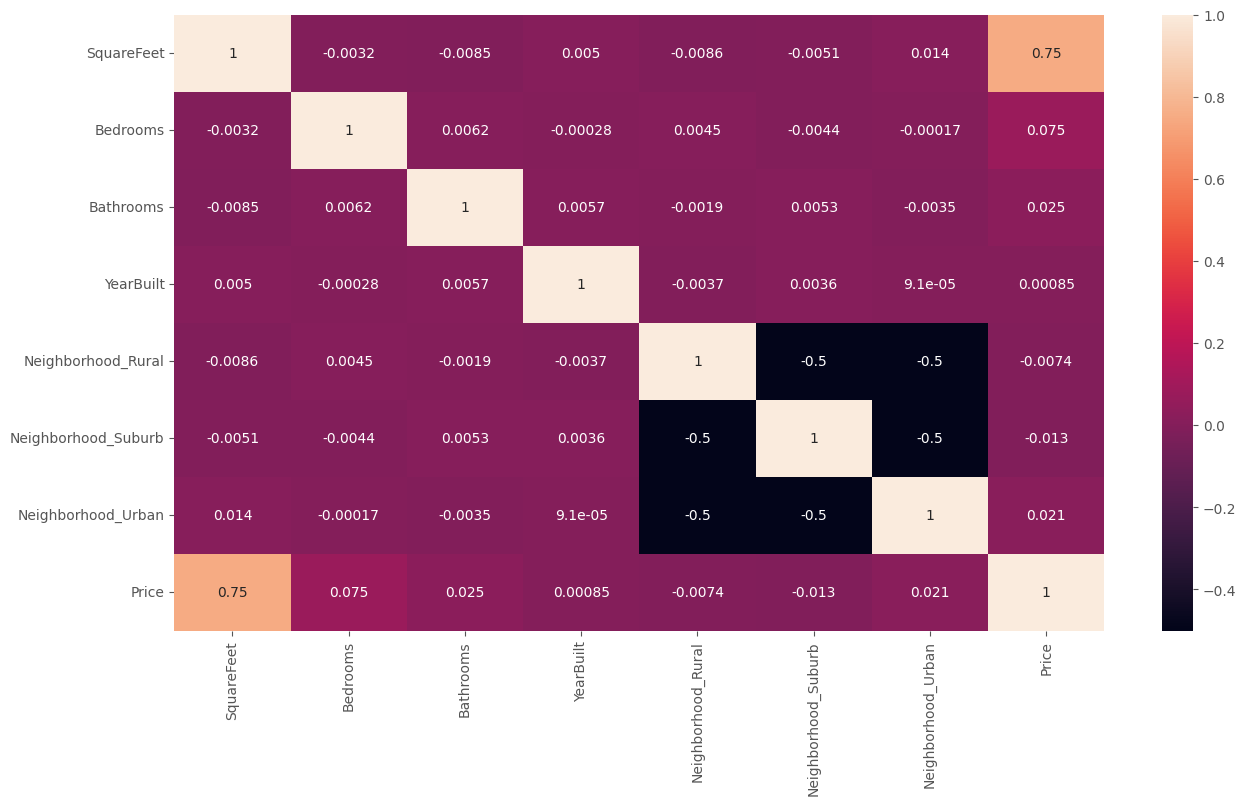

In [13]:
# Creating a seaborn heatmap to visualize the correlation.
# It appears having a larger home in square feet influences the price the most.
# Other features like year built, rural, and suburban have a negative impact on our price.
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [14]:
train_data.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt',
       'Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban',
       'Price'],
      dtype='object')

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

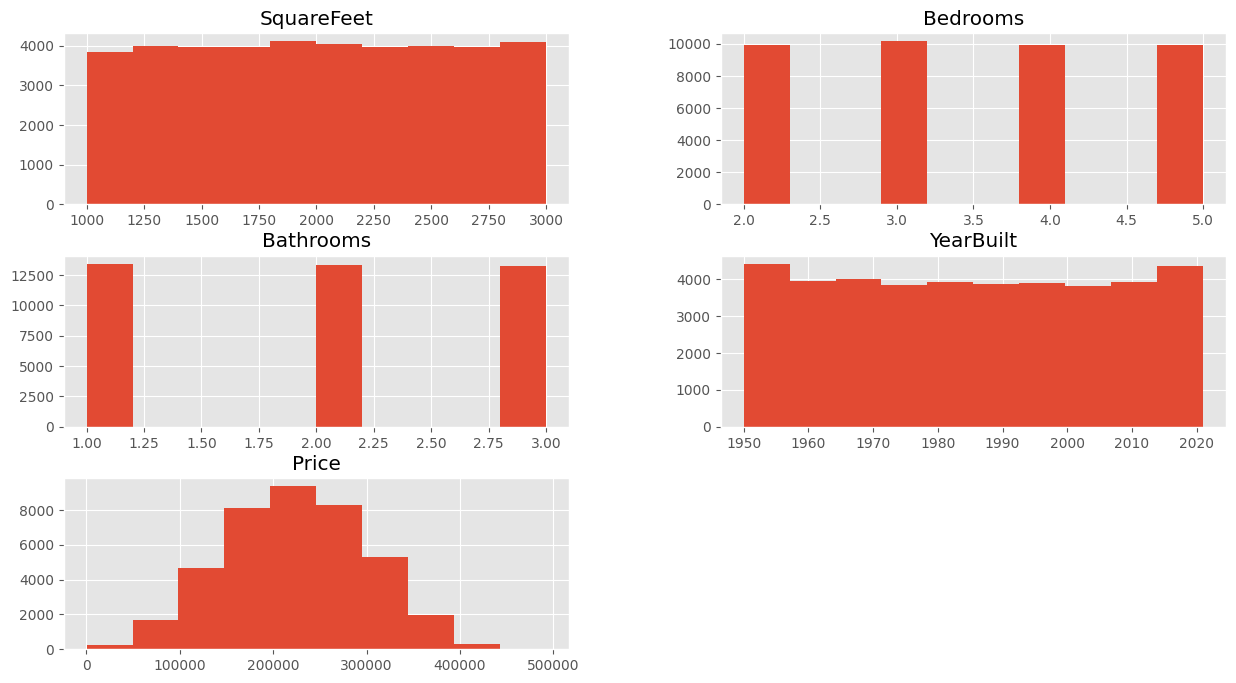

In [15]:
train_data.hist(figsize=(15, 8))

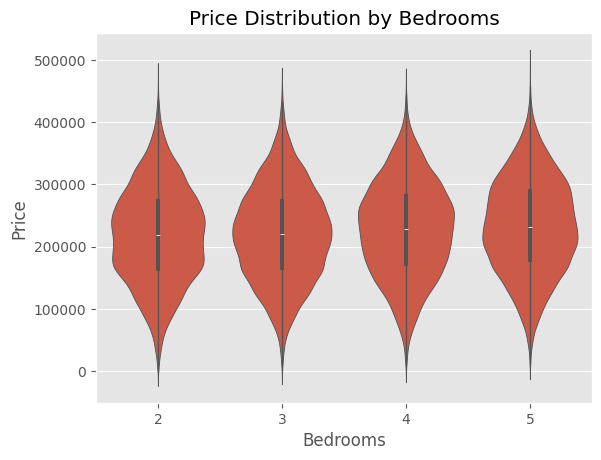

In [16]:
sns.violinplot(x='Bedrooms', y='Price', data=train_data)
plt.title('Price Distribution by Bedrooms')
plt.show()

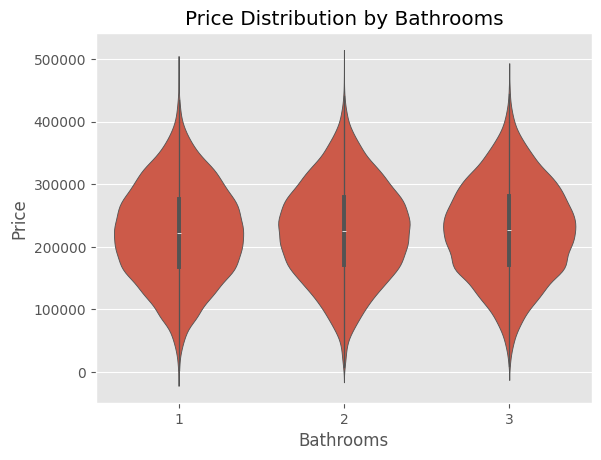

In [17]:
sns.violinplot(x='Bathrooms', y='Price', data=train_data)
plt.title('Price Distribution by Bathrooms')
plt.show()

<Axes: xlabel='SquareFeet', ylabel='Price'>

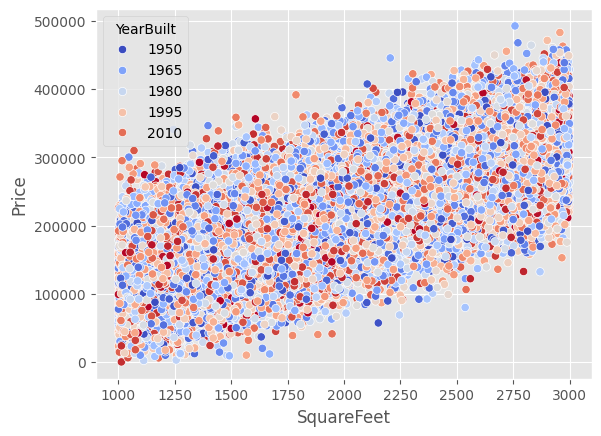

In [18]:
sns.scatterplot(data=train_data,
                hue='YearBuilt',
                palette='coolwarm',
                x='SquareFeet',
                y='Price')

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Build the Linear Regression model using the training set.
reg = LinearRegression().fit(X_train, y_train)

In [20]:
# Predict the target values using the model.
y_pred = reg.predict(X_test)

# Calculate the Mean Absolute Percentage Error.
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 31.13416854262305


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Building the model with the Random Forest Regression model.
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predict the target values using the model.
y_pred = rf_reg.predict(X_test)

# Calculate the Mean Absolute Percentage Error.
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 32.5958569911114


In [30]:
# Our model was more accurate using Linear Regression so we will use that for our predictions.
# We can make a prediction using the features in our model:
# 'SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt',
# 'Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban'
print('$' + f'{reg.predict([[1800, 3, 2, 1993, 0, 1, 0]])[0]:.2f}')

$200645.43


c:\Users\Jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# This cell will allow the user to make their own prediction.
def get_input(message):
    while True:
        try: 
            value = int(input(message))
            if value >= 1:
                break
            else: raise Exception()
        except: print("Please enter a positive integer value.")
    return value


sqft = get_input("Enter SquareFeet: ")
bedrooms = get_input("Enter number of bedrooms: ")
bathrooms = get_input("Enter number of bathrooms: ")
year_built = get_input("Enter the year the house was built: ")

rural = suburb = urban = 0
while True:    
    user_input = input("Please enter r for rural, s for suburb, or u for urban: ")
    if user_input == 'r':
        rural = 1
        break
    elif user_input == 's':
        suburb = 1
        break
    elif user_input == 'u':
        urban = 1
        break

print('Your predicted home value is $' + f'{reg.predict([[sqft, bedrooms, bathrooms, year_built, rural, suburb, urban]])[0]:.2f}')

Your predicted home value is $222641.68


c:\Users\Jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
